<a href="https://colab.research.google.com/github/youse0ng/AICE_/blob/main/AICE_08_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%EC%9C%BC%EB%A1%9CAI%EB%AA%A8%EB%8D%B8%EB%A7%81%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝으로 AI 모델링하기

## 사이킷런 라이브러리

머신러닝의 대표적인 라이브러리이며 사이킷런 라이브러리 기반 학습 및 예측 패턴의 4단계에서 실행 명령어의 예시는 다음과 같다.

1. 불러오기 (from sklearn.ensemble import RandomRorestClassifier)
2. 생성 clf=RandomForestClassifier(random_state=0)
3. 학습 clf.fit(X,y)
4. 예측 clf.predict(X)

이 4단계로 머신러닝 모델 개발이 완료된다.

## 선형 회귀

### 선형 회귀 이해하기

주식 같은 시계열 데이터의 그래프를 분석할 때 많이 쓰는 용어 중에 '추세선'이 있다.

추세선은 데이터의 추세를 그래프를 표현하여 이후의 패턴을 예측하는데 활용된다.  

이러한 통계 분석 방식을 회귀 분석이라고 한다.

우리가 학습해야 하는 머신러닝은 주어진 데이터를 바탕으로 label(Y)과 feature(X)의 관계를 가장 잘 설명하는 모델을 만드는 것이고, 그 모태가 되는 알고리즘, 즉 최적의 직서늘 기반으로 예측하는 방법이 선형 회귀이다.



### 선형 회귀 실습하기

선형 회귀 알고리즘은 sklearn의 linear_model 서브 패키지에서 제공하는 LinearRegression 클래스를 활용할 수 있다.

LinearRegression 클래스는 다음과 같은 하이퍼파라미터를 입력받는다.


- fit_intercept: 절편값의 계산 여부 지정

학습이 끝나면 모델은 다음 속성을 가진다.

- coef_: 학습된 모델 특성의 가중치 추정값
- intercept_: 학습된 모델의 절편 추정값


#### 데이터 구성하기

데이터는 y=4x+7이고, x의 입력할 데이터는 1~10이다.
y=4x+7로 출력된 결과이기 때문에,
해당 데이터를 학습한 모델이 핵심 숫자 2개(4와 7)를 기울기(coef) 및 절편(intercept)으로 지니는 모델이라면 학습이 잘 되었다고 판단할 수 있다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2023)

# x는 1~10, y=4x+7인 학습 데이터 생성하기
x=[]
y=[]

for i in range(1,11):
  x.append(i)
  y.append(4*i+7)

# 데이터 확인하기
print('x : ', x)
print('y : ', y)

x :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y :  [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


#### 선형 회귀 학습하기

In [2]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 생성하기
reg=LinearRegression()

# 학습을 위해 1행 10열 구성 데이터를 10행 1열로 변경하기
x=np.array(x)
print(x)
x=x.reshape(-1,1)

[ 1  2  3  4  5  6  7  8  9 10]


In [3]:
# 학습하기
reg.fit(x,y)

# 산식 추정을 위한 기울기(coef) 및 절편(intercept) 확인하기
print(f'''기울기 및 절편 확인 coef={reg.coef_},intercept={reg.intercept_}''')

# 절편과 기울기로 결과를 수동 계산하여 비교값 생성하기
coef_intercept=x*reg.coef_[0]+reg.intercept_
print('계산결과')
print(coef_intercept)

기울기 및 절편 확인 coef=[4.],intercept=6.9999999999999964
계산결과
[[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


In [4]:
reg.coef_[0],reg.intercept_

(4.000000000000001, 6.9999999999999964)

#### 결과 비교를 위한 그래프 그리기

[11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


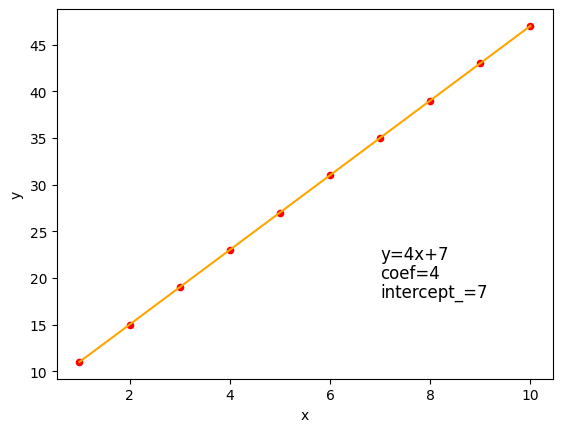

In [5]:
# scatter plot 그래프 그리기
plt.scatter(x,y,color='r',s=20)
print(y)
# 선 그래프 그리기
plt.plot(x,coef_intercept,color='orange')

# coef 값 그래프 내에 텍스트 삽입하기
plt.text(7,20,'coef=%.0f'%reg.coef_[0],size=12)

# intercept 값 그래프 내ㅔ 텍스트 삽입
plt.text(7,18,'intercept_=%.0f'%reg.intercept_,size=12)
plt.text(7,22,f'y={reg.coef_[0]:.0f}x+{reg.intercept_:.0f}',size=12)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 사례 기반 선형 회귀 모델링

국민건강보험공단_건강검진정보_20211229.csv 사용

키, 몸무게 등 다양한 데이터 중에 추론을 통해 예측했을 때, 유의미한 결과를 가져올 만한 변수를 찾아봅니다.

콜레스테롤 중 LDL 콜레스테롤은 건강에 좋지 않은 수치이기에 건강 검진에서 필요할 확률이 매우 높다. 이에 건강검진 데이터를 바탕으로 LDL 콜레스테롤의 수치를 예측해보는 선형 회귀 모델을 개발한다면 도움이 될 것이다.

따라서 해당 결과를 도출하는 모델을 간단히 만들어 봅니다.

우선 간단한 가설로 데이터 중에 치아 관련 문항은 콜레스테롤과 상관 없을 것이라는 가설을 세워서 실습을 진행하고 가중치를 확인해 봅니다.

모델링에 앞서 모델링을 위한 데이터를 전처리한다.



### 데이터 전처리

In [6]:
import pandas as pd

# 데이터 불러오기
df=pd.read_csv("HP_SCR_2020.CSV",encoding='cp949')

# pandas display 옵션 조정을 통해 View 범위 확정하기
pd.set_option('display.max_columns',None) # display 옵션을 통한 전체 열 확장

# 데이터 확인하기
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [7]:
# 가설을 참고하여 (치아와 관련된 문항+ 시력,청력) 데이터 컬럼 삭제
# 시력 청력 치아 관련 칼럼은 관계없다라는 가정으로 열 제거
df.drop(labels=["시력(좌)","시력(우)","청력(좌)","청력(우)","치석","구강검진 수검여부","치아우식증유무"],axis=1,inplace=True)
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,2021-12-29
1,2020,2,27,2,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,2021-12-29
2,2020,3,11,2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,2021-12-29
3,2020,4,31,1,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,2021-12-29


In [8]:
# 기준년도 칼럼 확인하기(모두 '2020' 동일 값이므로 '기준년도' 칼럼 삭제)
df['기준년도'].value_counts()
df.drop(['기준년도','데이터 공개일자'],axis=1,inplace=True)
df.head()

,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,1,36,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
1,2,27,2,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,3,11,2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,4,31,1,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
4,5,41,2,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0


In [9]:
# 가입자 일련번호 확인하기 (모두 unique한 값으로 확인되어 `가입자 일련번호` 칼럼 삭제)

print("가입자 일련번호 칼럼 확인")
df["가입자 일련번호"].value_counts()

df.drop(["가입자 일련번호"],axis=1,inplace=True)

가입자 일련번호 칼럼 확인


In [10]:
df.head()

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,36,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
1,27,2,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,11,2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,31,1,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
4,41,2,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0


In [11]:
print("성별코드 칼럼 확인")
df.성별코드.value_counts()

성별코드 칼럼 확인


성별코드
1    510689
2    489311
Name: count, dtype: int64

In [12]:
df.drop(['성별코드','시도코드'],axis=1, inplace=True)
df.head()

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
1,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
4,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0


In [13]:
# 별도의 test 데이터 추출하기
test=df[df['LDL 콜레스테롤'].isnull()] # LDL 콜레스테롤 칼럼이 NaN 값인 데이터 프레임 추출
test
print(df['LDL 콜레스테롤'].isnull())
# NaN 데이터 행 단위로 삭제하기
train=df.dropna(axis='index')

# 학습 데이터 확인하기
print('학습데이터 확인')
train.head()

0         False
1          True
2          True
3          True
4         False
          ...  
999995    False
999996    False
999997     True
999998    False
999999    False
Name: LDL 콜레스테롤, Length: 1000000, dtype: bool
학습데이터 확인


,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
4,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0
5,9,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0
6,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0
8,17,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0


In [14]:
test

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
1,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
7,13,160,65,92.0,131.0,79.0,93.0,NaN,NaN,NaN,NaN,15.9,1.0,1.2,18.0,17.0,19.0,3.0,0.0
9,14,150,45,71.2,124.0,83.0,85.0,NaN,NaN,NaN,NaN,13.2,1.0,0.6,22.0,11.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999988,16,165,60,81.0,116.0,72.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,1.0,21.0,16.0,13.0,2.0,1.0
999990,13,155,50,73.0,123.0,74.0,88.0,NaN,NaN,NaN,NaN,14.2,1.0,0.6,21.0,17.0,16.0,1.0,0.0
999993,14,170,65,86.0,150.0,90.0,76.0,NaN,NaN,NaN,NaN,13.0,3.0,1.0,29.0,18.0,25.0,2.0,1.0
999994,12,165,65,81.0,107.0,62.0,163.0,NaN,NaN,NaN,NaN,15.5,1.0,0.8,54.0,21.0,45.0,2.0,1.0


In [15]:
# 정답 데이터 생성하기
y=train['LDL 콜레스테롤']

# 학습 데이터 생성하기
x=train.drop(['LDL 콜레스테롤'],axis=1)

# validation set 추출을 위한 train_test_split 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# scikit learn에서 코드 비율대로 불러오기
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
# 학습/검증 데이터 확인
print("학습/검증데이터 확인")
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

학습/검증데이터 확인
(262749, 18) (262749,) (129415, 18) (129415,)


In [16]:
print(sum(range(3)))

3


### 선형 회귀 학습 및 추론하기

In [17]:
# 라이브러리 불러오기

from sklearn.linear_model import LinearRegression

# 모델 생성하기
reg=LinearRegression()

# 학습하기
reg.fit(X_train,y_train)

# 기울기와 절편
print(f"""
기울기 및 절편확인
기울기 확인 coef={reg.coef_}
절편 확인 intercept={reg.intercept_}
""")


기울기 및 절편확인
기울기 확인 coef=[ 0.10940698  0.01482723  0.03846911  0.04390587 -0.01075239 -0.00400628
 -0.00250987  0.96960416 -0.17471532 -0.7285143   0.14793707  0.02093034
  0.30343003 -0.01334047  0.01410607 -0.00855896  0.26395722 -0.70237274]
절편 확인 intercept=-22.424253230418486



In [18]:
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
print("전체에 대해서 가중치 확인")
q=[]
for index,columns in enumerate(X_train.columns):
  print(f"{columns} = {reg.coef_[index]}")
  q.append(f"{columns} = {reg.coef_[index]}")

print(f"q={q}")

전체에 대해서 가중치 확인
연령대 코드(5세단위) = 0.10940697813908513
신장(5Cm단위) = 0.01482723181531198
체중(5Kg 단위) = 0.03846910648118381
허리둘레 = 0.04390587116959583
수축기 혈압 = -0.010752389060190751
이완기 혈압 = -0.00400628268784467
식전혈당(공복혈당) = -0.0025098717581270753
총 콜레스테롤 = 0.9696041571709948
트리글리세라이드 = -0.1747153218786995
HDL 콜레스테롤 = -0.728514295030803
혈색소 = 0.1479370733676606
요단백 = 0.020930335819269584
혈청크레아티닌 = 0.3034300294921608
(혈청지오티)AST = -0.013340474467645323
(혈청지오티)ALT = 0.014106072133288418
감마 지티피 = -0.008558956086861202
흡연상태 = 0.2639572180775787
음주여부 = -0.7023727367515125
q=['연령대 코드(5세단위) = 0.10940697813908513', '신장(5Cm단위) = 0.01482723181531198', '체중(5Kg 단위) = 0.03846910648118381', '허리둘레 = 0.04390587116959583', '수축기 혈압 = -0.010752389060190751', '이완기 혈압 = -0.00400628268784467', '식전혈당(공복혈당) = -0.0025098717581270753', '총 콜레스테롤 = 0.9696041571709948', '트리글리세라이드 = -0.1747153218786995', 'HDL 콜레스테롤 = -0.728514295030803', '혈색소 = 0.1479370733676606', '요단백 = 0.020930335819269584', '혈청크레아티닌 = 0.3034300294921608'

가중치가 높다는 것은 그만큼 y 영향을 많이 준다는 의미이다.

주요 Feature 3개 {총 콜레스테롤, HDL콜레스테롤, 음주여부}


### 예측을 통한 최종 검증하기

In [19]:
# 예측하기
y_pred=reg.predict(X_test)

# 결과 검증을 위해 MSE 라이브러리 불러오기
# 최종적으로는 RMSE 사용하기
from sklearn.metrics import mean_squared_error

# MSE 라이브러리에서 RMSE는 squared 옵션을 False로 설정한다
rmse=mean_squared_error(y_test,y_pred,squared=False)

# 주요 Feature 삭제 전 rmse 확인하기
print(f"""주요 Feature 삭제 전 rmse={round(rmse,3)}""")

주요 Feature 삭제 전 rmse=8.127


주요 feature 들은 삭제 해보고 RMSE 값이 어떻게 나오는지 확인해보자

### 가중치의 의미 확인하기

In [20]:
# 주요 Feature 삭제를 위해 칼럼명 재확인
train.columns

Index(['연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부'],
      dtype='object')

In [21]:
x

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
4,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0
5,9,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0
6,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0
8,17,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,13,175,90,99.5,120.0,74.0,98.0,142.0,121.0,38.0,15.1,1.0,0.8,66.0,58.0,36.0,2.0,1.0
999995,13,145,55,81.0,132.0,78.0,124.0,178.0,301.0,43.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0
999996,12,160,55,76.5,100.0,64.0,98.0,288.0,93.0,71.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0
999998,9,160,70,91.0,137.0,82.0,111.0,208.0,113.0,59.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0


In [22]:
# 주요 Feature 삭제하기
x=x.drop(['총 콜레스테롤','트리글리세라이드','HDL 콜레스테롤'],axis=1)

# scikit learn 예시 코드 비율대로 불러오기
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

### 선형 회귀 모델 재학습하기

In [23]:
# 선형 회귀 재생성 및 학습하기
lr=LinearRegression()
lr.fit(X_train,y_train)

# 각각 데이터에 대해 가중치(또는 회귀 계수) 확인하기
print(f'''coef
{lr.coef_}
intercept
{lr.intercept_}''')

coef
[-2.42029175e+00 -3.33193684e-01 -2.06625915e-04 -6.04430610e-02
 -1.12762074e-01  2.60023059e-01 -1.40142661e-01  3.98600794e+00
 -1.43222741e+00 -3.09969695e-01 -5.96480461e-02  4.51315922e-02
 -2.61611789e-02 -3.08419949e+00 -1.22509065e+00]
intercept
164.22902318120168


### 가중치 비교하기

In [24]:
# 검증 데이터로 예측하기
y_pred=lr.predict(X_test)

# 각각 데이터에 대해 가중치 (또는 회귀 계수) 확인하기
print('가중치 확인')
for index,columns in enumerate(X_train.columns):
  print(f"{columns}={lr.coef_[index]}")

가중치 확인
연령대 코드(5세단위)=-2.420291748046784
신장(5Cm단위)=-0.33319368422959433
체중(5Kg 단위)=-0.00020662591490427928
허리둘레=-0.06044306095821972
수축기 혈압=-0.11276207375502907
이완기 혈압=0.26002305870440834
식전혈당(공복혈당)=-0.14014266127772726
혈색소=3.9860079356084603
요단백=-1.4322274117262992
혈청크레아티닌=-0.3099696949826478
(혈청지오티)AST=-0.05964804610827587
(혈청지오티)ALT=0.045131592170808775
감마 지티피=-0.02616117889993759
흡연상태=-3.0841994865298257
음주여부=-1.225090651818176


In [25]:
# 주요 Feature 삭제 후 RMSE 확인하기
rmse2=mean_squared_error(y_test,y_pred,squared=False)

# 가중치가 큰 특성을 삭제했을 때 영향을 많이 받는지 확인하기
print(f''' 주요 Feature 삭제 후 rmse={round(rmse2,3)}''')


 주요 Feature 삭제 후 rmse=38.847


## 로지스틱 회귀 모델


### 로지스틱 회귀 이해하기

로지스틱 회귀 모델은 시그모이드 함수를 사용하여 데이터를 설명하는 최적의 선으로
답을 찾는 알고리즘이다.

다만, 이름에 회귀가 있으나 분류에 사용되는 알고리즘입니다.

로지스틱 회귀 알고리즘의 산식은

S(x) =1/(1+e^-x) 입니다.


#### 시그모이드 함수 만들기

In [26]:
# numpy 라이브러리 및 그래프 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수 작정하기
def sigmoid(x):

  # numpy.exp() 함수는 미티 자연상수 e인 지수함수(e^x)로 변환
  return 1/(1+np.exp(-x))

# 함수 테스트용 데이터 생성하기
test=np.array([-1,0,1])

# 작성된 함수 확인하기
print(sigmoid(test))

[0.26894142 0.5        0.73105858]


#### 시그모이드 함수 그래프 그리기

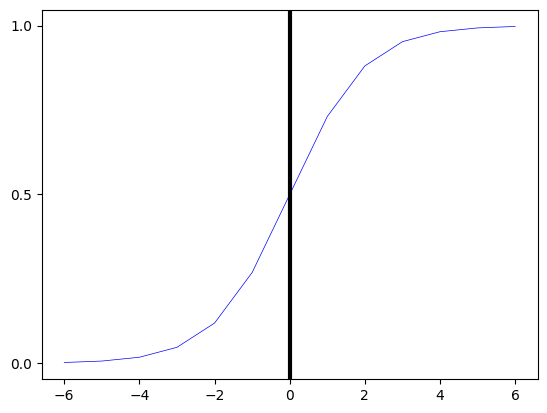

In [27]:
# 그래프 적용을 위한 데이터 만들기
sigmoid_x=range(-6,7)
sigmoid_y=sigmoid(np.array(sigmoid_x))

# 선 그래프 그리기
plt.plot(sigmoid_x,sigmoid_y,color='blue',linewidth=0.5)

# 백 그라운드 모눈 종이 설정하기
plt.rcParams['axes.grid']=True

# 선 긁기 설정하기
plt.axvline(x=0,color='black',linewidth=3)

# y축 범위 설정하기
plt.yticks([0,0.5,1])
plt.show()

### 로지스틱 회귀 실습하기
왜 로지스틱 회귀 모델을 학습하고 왜 분류 문제에서 선형 회귀 모델보다 로지스틱 회귀가 더 작합한지 살펴보자.

로지스틱 회귀 알고리즘은 sklearn의 linear_model 서브패키지에서 제공하는 LogisticRegression 클래스로 활용할 수 있다.

하이퍼파라미터:
- max_iter: 알고리즘의 수렴을 위한 반복의 최대 횟수
- penalty: 규제의 종류 선택('l1','l2','elasticnet','none')
- C: 규제의 강도를 조절하는 파라미터로 값이 클수록 규제가 약해지고 값이 작을수록 규제가 강해짐

학습이 끝나면 객체는 다음속성을 가짐
- LogisticRegression.coef_: 학습된 모형 특성의 가중치 추정값
- LogisticRegression.intercept_: 학습된 모델의 절편 추정값


#### 데이터 구성하기

In [28]:
# 학습데이터 생성하기
x_train=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train=[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

# 추론을 위한 데이터 생성하기
x_test=[0,1,2,18,19]
y_test=[0,0,0,1,1]

# 학습 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train)

# 추론 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_test=np.array(x_test).reshape(-1,1)
y_test=np.array(y_test)

# 데이터 확인하기
print(x_train)
print(y_train)

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


x_train 데이터 값이 9에서 10으로 넘어갈 때, y_train 데이터값이 0에서 1로 변하는 데이터를 준비

#### 로지스틱 회귀 학습하기


In [29]:
# 로지스틱 회귀 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 생성하기
logi_reg=LogisticRegression()

# 학습하기
logi_reg.fit(x_train,y_train)

# 역산을 위한 기울기와 절편이 있는지 확인
print('intercept: ',logi_reg.intercept_)
print('coef: ', logi_reg.coef_)

intercept:  [-11.34126808]
coef:  [[1.19383367]]


#### 로지스틱 회귀 그래프 만들기


[array([[-7.75976708]]), array([[-6.56593342]]), array([[-5.37209975]]), array([[-4.17826609]]), array([[-2.98443242]]), array([[-1.79059876]]), array([[-0.59676509]]), array([[0.59706857]]), array([[1.79090224]]), array([[2.9847359]]), array([[4.17856957]]), array([[5.37240324]]), array([[6.5662369]]), array([[7.76007057]]), array([[8.95390423]])]


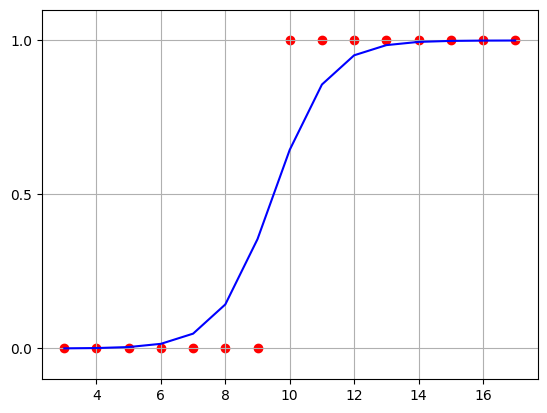

In [30]:
# 기울기와 절편을 수동으로 결과 만들기
odd=[] 
for i in x_train:
  odd.append((logi_reg.coef_*i) + logi_reg.intercept_)

print(odd)

sigmoid_y=sigmoid(np.array(odd))
sigmoid_y=sigmoid_y.reshape(-1,1)

# 역산된 그래프 표시하기
plt.scatter(x_train,y_train,color='red')
plt.plot(np.array(x_train),sigmoid_y,color='blue')
plt.rcParams['axes.grid']=True
plt.yticks([0,0.5,1])
plt.ylim([-0.1,1.1])
plt.show()

Text(0, 0.5, 'predict_from_Logi_model')

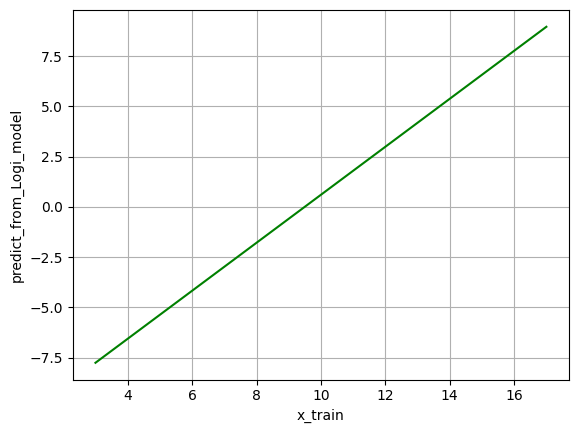

In [31]:
plt.plot([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],np.array(odd).squeeze(),color='green')
plt.xlabel('x_train')
plt.ylabel('predict_from_Logi_model')

coef와 intercept를 이용하여 그린 sigmoi 그래프가 데이터를 잘 표현하고 있음을 확인

지금부터는 선형 회귀와 로지스틱 회귀를 비교해서 두 모델 모두 같은 선형으로 모델링을 하지만 왜 선형 회귀는 수치를 예측하는 회귀 모델에, 로지스틱 회귀는 범주형 데이터를 예측하는 분류 모델에 더 적합한지 알아보자

### 로지스틱 회귀와 선형 회귀 비교하기

#### 선형 회귀 모델링하기

In [32]:
# 선형 회귀 함수 불러오기
from sklearn.linear_model import LinearRegression

# 선형 회귀 생성하기
lr=LinearRegression()

# 학습하기
lr.fit(x_train,y_train)

# 수식 완성을 위한 coef와 intercept 확인하기
print('intercept: ', lr.intercept_)
print('coef_: ',lr.coef_)

intercept:  -0.4666666666666667
coef_:  [0.1]


#### 선형 회귀 모델과 로지스틱 회귀 모델 비교하기

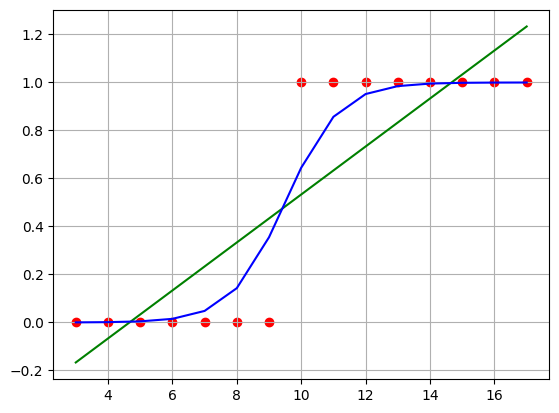

In [33]:
coef_intercept=x_train * lr.coef_ +lr.intercept_

plt.scatter(x_train,y_train,color='red')
plt.plot(np.array(x_train),coef_intercept,color='green')
plt.plot(np.array(x_train),sigmoid_y,color='blue')
plt.rcParams['axes.grid']=True
plt.show()

로지스틱 회귀는 Y축의 0.5(임계값 변경 가능)을 기준으로 yes 또는 No를 구분하여 이진/다중 분류에 강한 모델을 만든다.
반면 선형 회귀는 직선으로만 참 거짓을 구분한다.

위 학습 모델을 기반으로 예측할 때 9.5라는 데이터를 학습 모델에 넣는다면 어떤 결과가 나올까?


In [34]:
logi_pred=logi_reg.predict(np.array(9.5).reshape(-1,1))
print(f"로지스틱 회귀 분석 예측:{logi_pred}")

lr_pred=lr.predict(np.array(9.5).reshape(-1,1))
print(f'선형 회귀 분석 예측:{round(lr_pred[0])}')


로지스틱 회귀 분석 예측:[1]
선형 회귀 분석 예측:0


## 의사결정나무


### 의사결정나무 이해하기

지금부터는 트리 기반 알고리즘을 알아봅니다. 트리 기반 모델은 기본적으로 Feature를 조건 기반으로 참 거짓으로 나눠 마치 스무고개를 하듯이 학습을 이어나갑니다.

예를 들어, 시장에서 물건을 구매할 때, 사과,고기, 야채를 산다고 가정한다.
맨 처음 과일가게에서 '사과를 사면 다른 물건을 전부 살 수 있을까?' 라는 고민을 하게 된다. 내가 가진 자원(DATA)과 각 물건의 중요도(WEIGHT)를 기반으로 구매 여부(LABEL)을 비교하면서 고기와 야채를 살 것입니다.

최종적으로, 사과를 구매하는 단계까지 과정을 보면 사람이 의사결정을 하는 것과 유사하다.



### 의사결정나무 실습하기

건강검진 데이터를 가지고 음주여부를 성별, 키, 체중데이터를 기반으로 의사결정나무를 학습하고, 결과를 통해 의사결정나무의 원리를 알아보자.

sklearn의 tree 서브패키지 DecisionTreeClassifier(DEcisionTreeRegressor)클래스로 활용할 수 있다.

DecisionTreeclassifier의 파라미터

- max_depth: 깊어질 수 있는 최대 깊이, 과대적합 방지용
- max_features: 최대로 사용할 feature의 개수, 과대적합 방지요
- min_samples_split: 트리의 노드가 가지고 있는 최소한의 샘플 수, 과대적합 방지용



#### 데이터 준비하기

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df=pd.read_csv("HP_SCR_2020.CSV", encoding='cp949')

# 트리 예시를 만들기 위해 일부특성만 추출
sample_df=df[['신장(5Cm단위)','성별코드','체중(5Kg 단위)','음주여부']]

sample_df[:10]

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0
1,150,2,65,0.0
2,155,2,55,0.0
3,160,1,70,0.0
4,155,2,50,0.0
5,185,1,85,1.0
6,165,1,80,1.0
7,160,1,65,0.0
8,150,2,50,0.0
9,150,2,45,0.0


#### 데이터 전처리하기

In [36]:
# info 정보로 결측치(Null) 확인하기
print("Info 정보 확인")
sample_df.info()

Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   체중(5Kg 단위)  1000000 non-null  int64  
 3   음주여부        999804 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


In [37]:
# 백만개 데이터 중 196개 결측치가 포함된 행 삭제
sample=sample_df.dropna()

# 결측치 다시 확인
print("Drop 후 Info 정보 확인")
sample.info()

Drop 후 Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   999804 non-null  int64  
 1   성별코드        999804 non-null  int64  
 2   체중(5Kg 단위)  999804 non-null  int64  
 3   음주여부        999804 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


In [38]:
# 원핫 인코딩을 위해 데이터 object형태로 변경하기
sample=sample.astype('str')

# label(결과,y) 생성하기
y=sample.음주여부

# 음주여부 학습 데이터 구성하기
X=sample.drop('음주여부',axis=1)

# label 데이터의 편향성 확인하기
y.value_counts()

음주여부
1.0    584685
0.0    415119
Name: count, dtype: int64

In [39]:
X.head(15)

,신장(5Cm단위),성별코드,체중(5Kg 단위)
0,165,1,60
1,150,2,65
2,155,2,55
3,160,1,70
4,155,2,50
5,185,1,85
6,165,1,80
7,160,1,65
8,150,2,50
9,150,2,45


In [40]:
y.head(15)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     1.0
7     0.0
8     0.0
9     0.0
10    0.0
11    1.0
12    1.0
13    1.0
14    1.0
Name: 음주여부, dtype: object

In [41]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   신장(5Cm단위)   999804 non-null  object
 1   성별코드        999804 non-null  object
 2   체중(5Kg 단위)  999804 non-null  object
 3   음주여부        999804 non-null  object
dtypes: object(4)
memory usage: 38.1+ MB


In [42]:
sample.head()

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0
1,150,2,65,0.0
2,155,2,55,0.0
3,160,1,70,0.0
4,155,2,50,0.0


In [43]:
# 학습 검증 데이터 분리하기
x_train,x_valid,y_train,y_valid=train_test_split(
    X,y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

#### 의사결정나무 모델링하기

https://inuplace.tistory.com/548#:~:text=DecisionTreeClassifier%20%28%29%20criterion%20%3A%20%EB%B6%84%ED%95%A0%20%ED%92%88%EC%A7%88%EC%9D%84%20%EC%B8%A1%EC%A0%95%ED%95%98%EB%8A%94%20%EA%B8%B0%EB%8A%A5,%ED%8A%B8%EB%A6%AC%EC%9D%98%20%EC%B5%9C%EB%8C%80%20%EA%B9%8A%EC%9D%B4%20%28%EA%B0%92%EC%9D%B4%20%ED%81%B4%EC%88%98%EB%A1%9D%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EB%B3%B5%EC%9E%A1%EB%8F%84%EA%B0%80%20%EC%98%AC%EB%9D%BC%EA%B0%84%EB%8B%A4.%29
resource

In [44]:
# 의사결정나무 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델 생성하기
dt=DecisionTreeClassifier(random_state=1001,
                          max_depth=2
                          )

# 의사결정나무 학습하기
dt_model=dt.fit(x_train,y_train)

# 학습데이터 정확도확인
print("학습 정확도: ",dt_model.score(x_train,y_train))

# 검증데이터 정확도확인
print("검증 정확도: ",dt_model.score(x_valid,y_valid))

학습 정확도:  0.6622724709724284
검증 정확도:  0.661769044963768


In [45]:
feature_weights=dt_model.feature_importances_

features=x_train.columns
for i in range(len(features)):
  print(f"{features[i]} = {feature_weights[i]}")

# 성별 코드가 제일 유의미한 weight 가중치임을 확인.

신장(5Cm단위) = 0.17638569799847062
성별코드 = 0.8236143020015294
체중(5Kg 단위) = 0.0


#### 의사결정나무 그래프 그리기(import graphviz)


In [46]:
# 그래프 라이브러리 불러오기
import matplotlib.pyplot as plt

# 트리모양 그래프 작성을 위한 라이브러리 설치하기
#!pip install graphviz

# 그래프 라이브러리 불러오기
import graphviz

# 사이킷런의 graphviz 지원 모듈 불러오기
from sklearn.tree import export_graphviz

# 그래프 생성하기
tree_graph=graphviz.Source(export_graphviz(dt_model,max_depth=3,
                                           feature_names=x_train.columns,
                                           class_names=["O","X"],
                                           impurity=True))

# 그래프 파일 저장하기
tree_graph.render("tree_depth5",format='png')


# 그래프 출력하기
tree_graph

ModuleNotFoundError: No module named 'graphviz'

시각화된 각 네모칸은 노드라고한다. 맨 처음 시작하는 노드를 나무의 뿌리라고 하여 루트 노드라고한다.

각 노드에는 분할 조건, 지니계수, 입력된 샘플의 수, 각 Value별 count등이 있음.

노드에 분할 조건이 없으면 리프 노드라고 한다.

1. 성별코드 <= 1.5: 분할 조건
2. gini: 지니계수
3. samples: 입력된 데이터 개수
4. value: 입력된 데이터에서의 각 Class 별 개수
5. class: 리스트 내에서 가장 많은 데이터 value

의사결정나무는 지니계수(불순도 지표)를 낮추는 방향으로 가지를 분할한다.



###불순도 알아보기

지니계수는 불순도를 측정하는 지표로서, 데이터의 통계적인 분산의 정도를 정령화해서 표현한다.

Gini: 1-sum(p^2)

In [ ]:
# 불순도 함수 생성하기
def gini(x):
  n=x.sum()
  gini_sum=0

  for key in x.keys(): # 데이터프레임의 인덱스 숫자 뽑기
    gini_sum=gini_sum+(x[key]/n)*(x[key]/n)
    print(f"x[key] = {x[key]}")
  gini=1-gini_sum

  return gini

# 데이터 준비하기
과일바구니1=["사과"]*9
과일바구니2=["사과","바나나","사과",'바나나','바나나','바나나','복숭아','복숭아','복숭아']
과일바구니3=['사과','바나나','사과','바나나','사과','복숭아','복숭아','사과','복숭아']

In [ ]:
print(round(gini(pd.DataFrame(과일바구니1).value_counts()),3))

In [ ]:
print(round(gini(pd.DataFrame(과일바구니2).value_counts()),3))

In [ ]:
print(round(gini(pd.DataFrame(과일바구니3).value_counts()),3))

In [ ]:
pd.DataFrame(과일바구니2).value_counts()[2]

### 확인문제 1. max_depth 파라미터를 이용하여 1, 15, 30으로 각각의 모델을 만들어보고 validation score가 작은 max_depth 수치를 작성하세요. (Random_state=1001)


제일 낮았던 수치는 Max depth 1이었다.


In [73]:
df= pd.read_csv('HP_SCR_2020.CSV',encoding='cp949')
df.drop(['기준년도','가입자 일련번호','시도코드','성별코드','시력(좌)','시력(우)','청력(좌)','청력(우)','구강검진 수검여부','치아우식증유무','치석','데이터 공개일자'],axis=1,inplace=True)


In [74]:
df.drop(['연령대 코드(5세단위)'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   체중(5Kg 단위)  1000000 non-null  int64  
 2   허리둘레        999892 non-null   float64
 3   수축기 혈압      992468 non-null   float64
 4   이완기 혈압      992466 non-null   float64
 5   식전혈당(공복혈당)  992398 non-null   float64
 6   총 콜레스테롤     402306 non-null   float64
 7   트리글리세라이드    402322 non-null   float64
 8   HDL 콜레스테롤   402315 non-null   float64
 9   LDL 콜레스테롤   394471 non-null   float64
 10  혈색소         992389 non-null   float64
 11  요단백         987859 non-null   float64
 12  혈청크레아티닌     992398 non-null   float64
 13  (혈청지오티)AST  992399 non-null   float64
 14  (혈청지오티)ALT  992398 non-null   float64
 15  감마 지티피      992397 non-null   float64
 16  흡연상태        999657 non-null   float64
 17  음주여부        999804 non-null   float64
dtypes: float64(16), int64(2

In [79]:
# NaN 값 처리
df.dropna(axis=0).info()
df.dropna(axis=0,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 392164 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   392164 non-null  int64  
 1   체중(5Kg 단위)  392164 non-null  int64  
 2   허리둘레        392164 non-null  float64
 3   수축기 혈압      392164 non-null  float64
 4   이완기 혈압      392164 non-null  float64
 5   식전혈당(공복혈당)  392164 non-null  float64
 6   총 콜레스테롤     392164 non-null  float64
 7   트리글리세라이드    392164 non-null  float64
 8   HDL 콜레스테롤   392164 non-null  float64
 9   LDL 콜레스테롤   392164 non-null  float64
 10  혈색소         392164 non-null  float64
 11  요단백         392164 non-null  float64
 12  혈청크레아티닌     392164 non-null  float64
 13  (혈청지오티)AST  392164 non-null  float64
 14  (혈청지오티)ALT  392164 non-null  float64
 15  감마 지티피      392164 non-null  float64
 16  흡연상태        392164 non-null  float64
 17  음주여부        392164 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 56.8 MB


In [80]:
from sklearn.model_selection import train_test_split
X= df.drop(['음주여부'],axis=1) # 음주 여부 측정을 위한 학습데이터
y= df[['음주여부']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1001)

In [81]:
X

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태
0,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0
4,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0
5,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0
6,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0
8,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,175,90,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,1.0,0.8,66.0,58.0,36.0,2.0
999995,145,55,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0
999996,160,55,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0
999998,160,70,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0


In [82]:
y

,음주여부
0,0.0
4,0.0
5,1.0
6,1.0
8,0.0
...,...
999992,1.0
999995,0.0
999996,1.0
999998,0.0


In [86]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1001,
                             max_depth=15)
dtc.fit(X_train,y_train)
print(f'dtc의 train_score: {dtc.score(X_train,y_train)}')
print(f'dtc의 test_score: {dtc.score(X_test,y_test)}')

dtc의 train_score: 0.7702840968855484
dtc의 test_score: 0.6654724414468399


### max_feature 파라미터를 1,2,3, 으로 모델을 만들어보고 valiation score가 가장 높은 max_feature를 작성하라. (단, random_state=1001,max_depth는 1로 고정)



In [87]:
# sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# 선언하기 (max_depth 1, max_feature =1)
decision_tree_classifier=DecisionTreeClassifier(max_depth=1,
                                                random_state=1001,
                                                max_features=1
                                                )

# 학습하기
decision_tree_classifier.fit(X=X_train,y=y_train)

# 학습 데이터 결과 확인
print(f"학습 데이터 결과: {round(decision_tree_classifier.score(X_train,y=y_train),3)}")

# 검증 데이터 결과 확인
print(f"검증 데이터 결과: {round(decision_tree_classifier.score(X_test,y=y_test),3)}")

학습 데이터 결과: 0.573
검증 데이터 결과: 0.574


In [88]:
# sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# 선언하기 (max_depth 1, max_feature =2)
decision_tree_classifier=DecisionTreeClassifier(max_depth=1,
                                                random_state=1001,
                                                max_features=2
                                                )

# 학습하기
decision_tree_classifier.fit(X=X_train,y=y_train)

# 학습 데이터 결과 확인
print(f"학습 데이터 결과: {round(decision_tree_classifier.score(X_train,y=y_train),3)}")

# 검증 데이터 결과 확인
print(f"검증 데이터 결과: {round(decision_tree_classifier.score(X_test,y=y_test),3)}")

학습 데이터 결과: 0.581
검증 데이터 결과: 0.577


In [89]:
# sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# 선언하기 (max_depth 1, max_feature =3)
decision_tree_classifier=DecisionTreeClassifier(max_depth=1,
                                                random_state=1001,
                                                max_features=3
                                                )

# 학습하기
decision_tree_classifier.fit(X=X_train,y=y_train)

# 학습 데이터 결과 확인
print(f"학습 데이터 결과: {round(decision_tree_classifier.score(X_train,y=y_train),3)}")

# 검증 데이터 결과 확인
print(f"검증 데이터 결과: {round(decision_tree_classifier.score(X_test,y=y_test),3)}")

학습 데이터 결과: 0.581
검증 데이터 결과: 0.577


가장 높았던 max_feature는 1이다.

## 앙상블

다수의 기본 모델을 생성하고 결합하여 하나의 새로운 모델을 생성하는 것

다수의 모델을 결합하기에 일반 단일 모델보다 일반적으로 성능이 우수하다.

또한 편향과 분산을 모두 적절히 고려하기에 과적합(또는 과소적합) 방지에 용이

두가지 고려할 점은 어떤 모델을 사용할 것인가?와 어떻게 결합할 것인지이다.

1. 어떤 모델을 사용할 것인지를 고려하여 성능 개선에 효과적인 모델을 선택해서 결합한다.

  대표적인 모델이 RandomForest와 Gradient Boosting이다.

  해당 모델은 의사결정나무를 기본 모델로 결합한 알고리즘이다.

2. 어떻게 결합할 것인지를 고려하여 성능 개서네 효과적인 방법을 선택

  결합하는 앙상블 기법에는 보팅,배깅,부스팅이 있다.

  RandomForest는 의사결정나무를 병렬로 결합한 배깅 모델, Gradient Boosting은 의사결정나무를 순차적으로 결합한 부스팅 모델이다.



### 보팅 이해하기

각각 다른 알고리즘을 이용한 모델을 결합하는 방식

여러 모델의 결과를 기반으로 투표에 의해 결과를 도출한다.

보팅은 하드 보팅과 소프트 보팅으로 나뉜다.

1. 하드 보팅은 각 모델의 결과 중 가장 많이 분류된 결과로 최종 결과를 선정하는 방법

  예를 들어, 모델 1은 사과를 분류해냈고, 모델 2는 바나나를 분류, 모델 3은 사과를 분류를 했다면, 다수결 또는 많이 분류된 결과로 사과로 최종적인 결괏값을 내보냅니다.

  이것이 하드보팅입니다.

2. 반면 소프트 보팅은 각 모델별 예측한 확률값의 평균으로 최종값을 선정하는 방법

  각 모델은 각 카테고리별 예측 확률을 출력하는 것을 확인한다.

  이때 소프트 보팅 기반 앙상블 모델은 3개의 모델이 출력한 각 카테고리의 확률값 평균으로 최종 확률값을 계산하고 최종 확률값이 가장 높은 바나나를 출력한다.



### 배깅 이해하기

배깅은 Boost Aggregating의 줄임말로, 부트스트랩 기반 샘플링 기법을 통해 하나의 알고리즘을 학습하여 생성된 여러 모델의 결과를 결합하는 알고리즘이다.

1. 학습 데이터로부터 부트스트랩 샘플링을 진행하여 부트스트랩 데이터 생성

2. 각 부트스트랩 데이터로 다수의 개별 모델을 학습한다.

3. 최종 예측을 위해 보팅을 진행한다.

배깅은 복원 샘플링을 통해 최종 모델의 분산을 줄여줌으로써 예측력을 향상하며, 병렬 학습이 가능하다.

대표적인 알고리즘으로 랜덤포레스트가 있음.



### 부스팅 이해하기

예측력이 약한 모델 여러 개를 순차적으로 연결하여 예측력이 강한 모델을 만드는 앙상블 방법

부스팅은 모델을 직렬로 결합하여 앞선 모델이 예측한 것 중 틀린 데이터에 가중치를 부여하여 틀린 데이터를 더 잘 맞히도록 학습한다.

1. 학습 데이터의 관측치를 동일한 가중치를 세팅하여 학습을 진행하고 모델 예측을 수행

2. 모델 예측에 의해 오분류된 관측치에는 높은 가중치를 부여, 정분류된 관측치에는 낮은 가중치를 부여하여 학습 데이터를 다시 샘플링하고 학습을 진행

3. 마지막으로 각 모델의 예측 결과를 결합할 때, 각 모델에 가중치를 주어 가중 평균을 계산하는 방식으로 최종값 출력

AdaBoost Gradient Boosting, XGBoost, LIghtGBM

## 랜덤포레스트

### 랜던 포레스트 실습하기

의사결정나무와 랜덤 포레스트 2가지 모델을 만들고 비교해서 모델별 특징과 학습 방법을 알아보자.

sklearn.ensemble RandomForestClassifier 클래스

하이퍼파라미터
- max_depth: 깊어질 수 있는 최대 깊이
- n_estimators: 앙상블하는 트리의 개수
- max_features: 최대로 사용할 feature 개수
- min_samples_split: 트리가 분할할 때 최소 샘플의 개수



#### 데이터 준비하기


In [90]:
# tensorflow 라이브러리 설치
!pip install tensorflow

# tensorflow에서 제공하는 데이터셋 mnist 불러오기
from tensorflow.keras.datasets.mnist import load_data

# load_data로 데이터할당
(x_train,y_train),(x_test,y_test)=load_data()

# 손 글씨 데이터는 이미지라 3차원 행렬
print("변경 전 =", x_train.shape)

# 3c차원 행렬을 2차원으로 변경
X_train=x_train.reshape(-1,784)
X_test=x_test.reshape(-1,784)

# 변경 결과확인하기
print("변경 후 = ", X_train.shape)

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.w

#### 의사 결정 나무 모델링하기


In [91]:
# 의사결정나무 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 학습하기
dct=DecisionTreeClassifier(random_state=0)
dct.fit(X_train,y_train)

# 의사결정나무 결과 확인
acc_train_dct=dct.score(X_train,y_train)
acc_test_dct=dct.score(X_test,y_test)

print(f"학습 결과 {acc_train_dct}, 검증 결과 {acc_test_dct}")

학습 결과 1.0, 검증 결과 0.8781


#### 랜덤 포레스트 모델링 및 결과 비교하기

In [92]:
# 랜덤 포레스트 불러오기
from sklearn.ensemble import RandomForestClassifier

# 랜던 포레스트 선언 및 학습하기
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

# 랜덤 포레스트 결과보기
acc_train_rfc=rfc.score(X_train,y_train)
acc_test_rfc=rfc.score(X_test,y_test)

# 학습 결과 수치로 출력하기
print(f"의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}")
print(f"랜덤 포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}")



의사결정나무: train_acc = 1.0, test_acc = 0.878
랜덤 포레스트: train_acc = 1.0, test_acc = 0.97


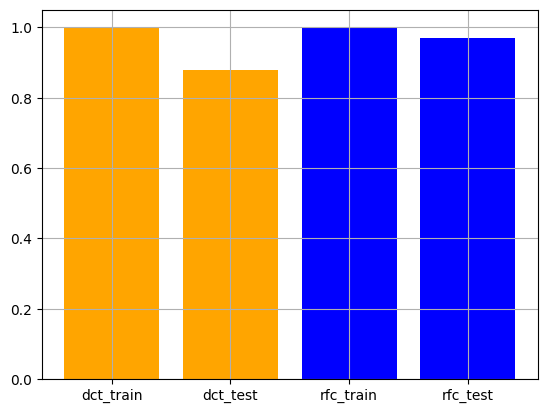

In [93]:
# 랜덤 포레스트 결과를 토대로 비교 그래프 그리기

import matplotlib.pyplot as plt

# x축 정의하기
acc_list_x = ["dct_train","dct_test",'rfc_train','rfc_test']

# y축 정의하기
acc_list_y = [acc_train_dct,acc_test_dct,acc_train_rfc,acc_test_rfc]

# 막대 그래프 차트 색 정의하기
colors = ['orange','orange','blue','blue']

# 막대 그래프 설정하기
plt.bar(acc_list_x,acc_list_y,color=colors)

# 화면 출력
plt.show()

### 랜덤 포레스트와 의사결정나무 비교

랜덤 포레스트의 하이퍼 파라미터를 튜닝하여 의사결정나무와 유사한 결과가 나오도록 해보자

랜덤 포레스트와 의사결정나무의 차이저믈 이론에서 유추해보면 다음과같다.

1. 부트스트래핑 활용 유무
2. 모델의 결합

이번 실습에서 부트스트랩을 제한하고, 모델의 개수를 1개로 지정하여 의사결정나무의 형태로 만들고 결과를 보자


In [94]:
# 의사결정나무 결과와 동일하게 랜덤 포레스트 구성하기
rft=RandomForestClassifier(
    random_state=0,

    # 나무 개수를 1개로 설정하기
    n_estimators=1,

    # 부트스트랩 제한
    bootstrap=False,

    # max_features는 의사결정나무로 변경
    max_features=None
)
rft.fit(X_train,y_train)

# 학습 결과 저장하기
acc_train_rfc=rft.score(X_train,y_train)
acc_test_rfc=rft.score(X_test,y_test)
acc_train_dtc=dct.score(X_train,y_train)
acc_test_dtc=dct.score(X_test,y_test)

# 의사결정나무 & 랜덤 포레스트가 유사한 결과를 출력하는지 비교
print(f"의사결정나무 : train_acc = {round(acc_train_dtc,3)}, test_acc = {round(acc_test_dtc,3)}")
print(f"랜덤 포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}")

의사결정나무 : train_acc = 1.0, test_acc = 0.878
랜덤 포레스트: train_acc = 1.0, test_acc = 0.877


#### Max_features 값을 40,50,60 으로 변경해보고 가장 좋은 결과값을 작성하세요.

Max_features 값에 따른 MNIST 분류 스코어 알아보기

In [95]:
print(f"X_train : {X_train.shape}")
print(f"y_train: {y_train.shape}")

print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")



X_train : (60000, 784)
y_train: (60000,)
X_test: (10000, 784)
y_test: (10000,)


In [96]:
rft40=RandomForestClassifier(max_features=40,
                             random_state=42
                             )

rft50=RandomForestClassifier(max_features=50,
                             random_state=42
                             )
rft60=RandomForestClassifier(max_features=60,
                             random_state=42
                             )

rft40.fit(X_train,y_train)
rft50.fit(X_train,y_train)
rft60.fit(X_train,y_train)

RandomForestClassifier(max_features=60, random_state=42)

분류 점수 보기

In [97]:
print(f"acc_Score for Train RFT40: {rft40.score(X_test,y_test)}")
print(f"acc_Score for Test RFT40: {rft40.score(X_test,y_test)}")

print(f"acc_Score for Train RFT50: {rft50.score(X_test,y_test)}")
print(f"acc_Score for Test RFT50: {rft50.score(X_test,y_test)}")

print(f"acc_Score for Train RFT60: {rft60.score(X_test,y_test)}")
print(f"acc_Score for Test RFT60: {rft60.score(X_test,y_test)}")

acc_Score for Train RFT40: 0.97
acc_Score for Test RFT40: 0.97
acc_Score for Train RFT50: 0.9699
acc_Score for Test RFT50: 0.9699
acc_Score for Train RFT60: 0.9695
acc_Score for Test RFT60: 0.9695


## 그래디언트 부스팅

부스팅 계열의 알고리즘으로, 트리 기반의 모델을 직렬로 연결하여 앞선 모델이 예측한 것 중 틀린 데이터에 가중치를 부여하여 더 잘 학습되도록 하는 알고리즘

- 직렬로 연결하여 모델이 예측한 것 중 틀린 데이터에 가중치를 부여!

- 트리기반모델을 직렬로 연결 !

배깅은 병렬로 모델을 연결하여 학습이 진행되기에, 각각의 모델 생성이 가능하지만,

부스팅 계열의 알고리즘은 순차적으로 학습이 진행된다.

따라서 부스팅 계열의 알고리즘이 배깅의 알고리즘보다 학습이 더 오래 지속된다.

그러나 부스팅 계열의 장점은 앞선 모델을 개선하는 방향으로 학습하기 때문에, 어려운 데이터에 대해 좀 더 좋은 성능을 가진 모델을 만들어낼 수 있다.

그래디언트 부스팅은 이진 분류나 연속적인 수치 예측에도 잘 작동한다.



### 그래디언트 부스팅 실습하기

sklearn.ensemble import GradientBoostingClassifier

하이퍼파라미터
- learning rate: 학습률
- n_estimator: 부스팅 스테이지 수, default =100 (n_estimator가 커질수록 과대적합 확률이 높음)
- max_depth: 트리의 깊이, 과대적합 방지용, default=3
- subsample: 샘플 사용 비율, 과대적합 방지용, default=1.0
- max_features: 최대로 사용할 수 있는 feature의 비율, 과대적합 방지용, default=1.0





#### 데이터 준비하기

X_train.shape :(5000, 28, 28)
X_test.shape: (2000, 28, 28)
y_train.shape: (5000,)
y_test.shape: (2000,)
X_train[1]: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253

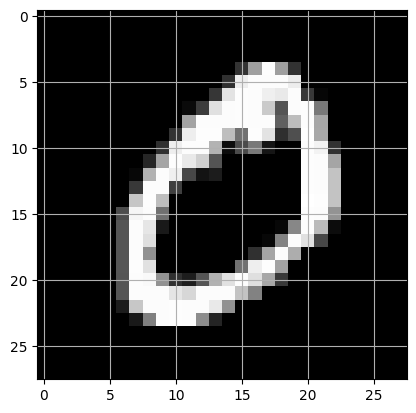

In [98]:
# tensorflow에서 데이터 불러오기
from tensorflow.keras.datasets.mnist import load_data

# 그래프 라이브러리 불러오기
import matplotlib.pyplot as plt

# 데이터 불러오기
(X_train,y_train),(X_test,y_test)=load_data()

# 학습 시간을 고려하여 데이터 10000건, 2000건만 사용
X_train=X_train[:5000]
y_train=y_train[:5000]

X_test=X_test[:2000]
y_test=y_test[:2000]

print(f"X_train.shape :{X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

# 샘플 데이터 이미지 확인하기
print(f'X_train[1]: {X_train[1]}')

plt.imshow(X_train[1],cmap='gray') # figure에 이미지를 그린다.
plt.show() # figure를 보여준다

In [99]:
# 학습을 위한 2차원 행렬 변경
print(f"X_train.shape: {X_train.shape}")
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)
print(f"X_train.shape{X_train.shape}")

X_train.shape: (5000, 28, 28)
X_train.shape(5000, 784)


#### 알고리즘별 학습 및 결과 비교하기

In [100]:
# 의사결정나무, 랜덤 포레스트, 그래디언트 부스팅 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 의사결정나무 불러오기 및 학습하기
dct=DecisionTreeClassifier(random_state=0)
dct.fit(X_train,y_train)

# 의사결정나무 학습 결과 저장하기
acc_train_dct=dct.score(X_train,y_train)
acc_test_dct=dct.score(X_test,y_test)

# 랜덤 포레스트 불러오기 및 학습하기
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

# 랜덤 포레스트 학습 결과 저장하기
acc_train_rfc=rfc.score(X_train,y_train)
acc_test_rfc=rfc.score(X_test,y_test)

# 그래디언트 부스팅 불러오기 및 학습하기
gbc=GradientBoostingClassifier(random_state=0,verbose=1)
gbc.fit(X_train,y_train)

# 그래디언트 부스팅 학습결과 저장하기
acc_train_gbc=gbc.score(X_train,y_train)
acc_test_gbc=gbc.score(X_test,y_test)

# 각 알고리즘별 성능 비교하기
print(f"의사 결정 나무: train_acc={round(acc_train_dct,3)}, test_acc={round(acc_test_dct,3)}")
print(f"의사 결정 나무: train_acc={round(acc_train_rfc,3)}, test_acc={round(acc_test_rfc,3)}")
print(f"의사 결정 나무: train_acc={round(acc_train_gbc,3)}, test_acc={round(acc_test_gbc,3)}")

      Iter       Train Loss   Remaining Time 
         1           1.8766            7.86m
         2           1.6444            7.21m
         3           1.4674            6.95m
         4           1.3168            6.81m
         5           1.1889            6.62m
         6           1.0845            6.46m
         7           0.9953            6.38m
         8           0.9179            6.29m
         9           0.8525            6.32m
        10           0.7930            6.25m
        20           0.4457            5.64m
        30           0.2929            4.93m
        40           0.2116            4.27m
        50           0.1624            3.58m
        60           0.1240            2.92m
        70           0.1002            2.17m
        80           0.0806            1.43m
        90           0.0657           42.63s
       100           0.0540            0.00s
의사 결정 나무: train_acc=1.0, test_acc=0.746
의사 결정 나무: train_acc=1.0, test_acc=0.908
의사 결정 나무: train_acc

# 딥러닝 프레임워크 텐서플로우



## 심층신경망으로 항공사 고객 만족 분류 모델을 구현해 봅니다.

### 데이터 불러오기 및 확인하기


In [102]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import warnings

# 경고 메세지를 무시하도록 설정하기
warnings.filterwarnings('ignore')

# csv 파일에서 데이터를 로드해서 데이터프레임으로 저장하기
df=pd.read_csv("Invistico_Airline.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [105]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [106]:
# 요약 통계량 확인하기 (min,max,std,mean,count)
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [107]:
# 결측치 확인하기
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Arrivial Delay in Minutes 393개 결측치 존재

### 데이터 전처리하기

신경망 모델의 입력데이터는 결측치가 없어야하고, 기본적으로 수치형 데이터를 사용합니다.

그러므로, 범주형 데이터를 수치형 데이터로 변환하는 인코딩 작업을 하며,
수치형 데이터도 모델 성능을 높이기 위해 데이터 스케일링 등의 변환 작업이 요구된다.



#### 결측치 처리하기

sklearn의 SimpleImputer 객체를 사용하여 도착 지연 시간(Arrival Delay  in Minutes) 칼럼에 있는 결측치를 평균값으로 치환

In [108]:
# SimpleImputer 객체로 결측치 대체하기
from sklearn.impute import SimpleImputer # 결측치 대체하는 함수

mean_imputer=SimpleImputer(strategy="mean")
df["Arrival Delay in Minutes"] = mean_imputer.fit_transform(df[["Arrival Delay in Minutes"]])

df.isnull().sum()
# 결측치가 사라짐

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#### 데이터 인코딩하기
Object 칼럼의 유형을 String 유형으로 변경하기

In [109]:
# Object 칼럼 유형을 string으로 변경하기
cols=['satisfaction','Gender','Customer Type','Type of Travel','Class']
df[cols]=df[cols].astype(str)

In [110]:
# 범주형 데이터를 수치값으로 변경하기
df['satisfaction'].replace(['dissatisfied','satisfied'],[0,1],inplace=True)
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [111]:
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [112]:
# 순서형 인코딩하기
categories=pd.Categorical(
    df['Class'],
    categories=['Eco','Eco Plus','Business'],
    ordered=True
)
labels,unique=pd.factorize(categories,sort=True)
df['Class'] = labels
df['Class']

0         0
1         2
2         0
3         0
4         0
         ..
129875    0
129876    2
129877    0
129878    0
129879    0
Name: Class, Length: 129880, dtype: int64

좌석 등급(Class) 칼럼은 순서를 고려해 정수 1~N으로 순서형 인코딩을 합니다.

'Eco','Eco Plus','Business'값이 0,1,2로 변환된다.

순서형 인코딩은 pd.Categorical

In [113]:
labels,unique

(array([0, 2, 0, ..., 0, 0, 0], dtype=int64),
 ['Eco', 'Eco Plus', 'Business']
 Categories (3, object): ['Eco' < 'Eco Plus' < 'Business'])

범주형 데이터인 성별(Gender), 고객 유형(Customer Type), 여행 유형(Type of Travel)
칼럼은 원핫 인코딩을 적용하기
원핫인코딩 0과 1의 벡터로만 표현하는 기법이다.
범주의 수만큼 벡터의 수가 생성되므로, 각 범주가 새로운 특성이 된다.

In [114]:
cat_cols=['Gender','Customer Type','Type of Travel']
df=pd.get_dummies(df,columns=cat_cols)

In [115]:
df.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Female                           bool
Gender_Male                             bool
Customer T

#### 데이터세트 분리하기

데이터세트를 입력(X)과 레이블(y)로 분리하고, 훈련 데이터세트와 검증 데이터세트로 분리합니다.

데이터세트는 test_size에 지정한 비율로 분리된다.

In [116]:
from sklearn.model_selection import train_test_split

# 데이터세트를 입력(X)과 레이블(y)로 분리하기
X=df.drop(['satisfaction'],axis=1)
y=df['satisfaction'].reset_index(drop=True)
print(y)
# 데이터세트를 훈련데이터와 검증 데이터로 분리하기
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"훈련 데이터세트 크기: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"검증 데이터세트 크기: X_test: {X_test.shape}, y_test: {y_test.shape}")

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64
훈련 데이터세트 크기: X_train: (103904, 25), y_train: (103904,)
검증 데이터세트 크기: X_test: (25976, 25), y_test: (25976,)


#### 데이터 스케일링하기 MinMaxScaler, StandardScaler

특성별로 데이터의 스케일이 다르면 딥러닝이 잘 동작하지 않을 수 있습니다.

따라서 데이터 스케일링 작업을 통해 모든 특성의 범위를 유사하게 만들어줘야합니다.

사이킷런 MinMaxScaler 객체로 데이터의 최소값,최댓갑슬 이용하여 데이터를 특정범위 (0~1사이)로 스케일링하여 특성을 정규화합니다.

StandardScaler 객체도 스케일링에 많이 사용된다.

StandardScaler는 특성들의 평균을 0, 분산을 1로 스케일링하여 정규분포로 만드는 표준화를 한다.



In [117]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화하기
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_test)

print(X_train)

[[0.15384615 0.         0.34502246 ... 1.         1.         0.        ]
 [0.33333333 0.         0.44051587 ... 1.         1.         0.        ]
 [0.48717949 0.         0.26546877 ... 0.         1.         0.        ]
 ...
 [0.35897436 1.         0.31459209 ... 0.         1.         0.        ]
 [0.17948718 0.         0.25010868 ... 0.         0.         1.        ]
 [0.19230769 1.         0.62860455 ... 0.         1.         0.        ]]


### 심층신경망 모델 생성하기

입력데이터는 25개(satisfaction 제외), 은닉층은 여러개, 출력은 1개인 이진 분류를 위한 심층 신경망 (DNN) 모델을 구성합니다.

은닉층의 활성화 함수는 'ReLU'를 사용한다.

마지막 층의 활성화 함수는 출력이 1개인 이진 분류모델이므로 'sigmoid'를 사용합니다.


In [118]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import random
import numpy as np

# 모델 시드 고정하기
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Keras의 Sequential 객체로 딥러닝 모델 구현
initializer=tf.keras.initializers.GlorotUniform(seed=42) # 모델 시즈 고정하기
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(25,),kernel_initializer=initializer))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [119]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

가중치 초기화(initialization)를 위해 사용되는 초기화 방법 중 하나인 Glorot 초기화(Xavier 초기화)를 설정하는 코드입니다

Glorot 초기화는 다음과 같은 주요 특징을 가지고 있습니다:

- 가중치 초기화의 분산을 조절하여 그레디언트 소실 및 폭주 문제를 완화합니다.
- 입력 및 출력 유닛의 수에 따라 적절한 초기화 스케일을 자동으로 조정합니다.
- 일반적으로 sigmoid 또는 tanh 활성화 함수와 함께 사용할 때 효과적입니다.

### 모델 컴파일하기

In [120]:
# 모델을 학습시킬 최적화 방법, Loss 함수, 평가 방법등을 설정
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### 모델 학습하기

EarlyStopping 의 주요 인자

- monitor: 학습 조기 종료를 위한 성능 모니터링 도구, val_loss나 val_accuracy가 주로 사용되며 기본값은 val_loss

- min_delta: 개선되고 있다고 판단하기 위한 최소 변화량

- patience: 성능 향상을 몇 번의 에포크 동안 기다릴지 설정하며 기본값은 0

- verbose: 얼마나 자세하게 정보를 표출할 것인가를 지정, 가능한 값은 0 1 2

- mode: 성능 모니터링 도구의 개선 판단 기준으로, monitor 설정 값에 따라
val_loss면 min, val_accuracy면 max로 설정한다.


- restore_best_weights: 관찰 항목의 가장 좋은 값을 가지는 에포크의 모델 가중치 복원 여부. 기본값은 False로 학습에포크의 마지막 가중치를 보존합니다.




모델 학습시 너무 많은 에포크 수는 과대적합을 발생시킬 수 있다.

이를 방지하기 위한 방법으로 조기종료 (EalryStopping) 이 있다 조기 종료는 검증 데이터세트에서 성능이 더이상 증가하지 않으면
중단하는 방법으로 model.fit함수의 callback 매개변수에 넣어주면 조기 종료된다.



In [121]:
# 모델 학습하기
es=EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100,batch_size=128,verbose=1,validation_data=(X_val,y_test),callbacks=[es])

# validation loss가 10번 이상 개선되지 않으면 학습을 중단하고, 가장 성능이 좋았을 때의 가중치를 사용, 훈련과정의 loss, accuracy를 history에 저장

Epoch 1/100
812/812 [==============================] - 5s 4ms/step - loss: 0.2832 - accuracy: 0.8796 - val_loss: 0.1955 - val_accuracy: 0.9178
Epoch 2/100
812/812 [==============================] - 2s 3ms/step - loss: 0.1863 - accuracy: 0.9226 - val_loss: 0.1631 - val_accuracy: 0.9296
Epoch 3/100
812/812 [==============================] - 2s 3ms/step - loss: 0.1564 - accuracy: 0.9334 - val_loss: 0.1448 - val_accuracy: 0.9371
Epoch 4/100
812/812 [==============================] - 3s 3ms/step - loss: 0.1406 - accuracy: 0.9399 - val_loss: 0.1399 - val_accuracy: 0.9399
Epoch 5/100
812/812 [==============================] - 3s 4ms/step - loss: 0.1327 - accuracy: 0.9435 - val_loss: 0.1209 - val_accuracy: 0.9468
Epoch 6/100
812/812 [==============================] - 3s 4ms/step - loss: 0.1254 - accuracy: 0.9460 - val_loss: 0.1336 - val_accuracy: 0.9418
Epoch 7/100
812/812 [==============================] - 3s 3ms/step - loss: 0.1221 - accuracy: 0.9475 - val_loss: 0.1148 - val_accuracy: 0.9496

### 모델 훈련과정 시각화하기

> fit() 메소드는 history 객체를 반환합니다.

history.history 속성은 모델의 훈련과정에서 에포크에 따른 정확도와 같은 성능 지표와 손실값을 기록 그리고 검증 지표와 손실값도 기록

accuracy,val_accuracy,loss,val_loss를 그래프로 출력하여 시각화





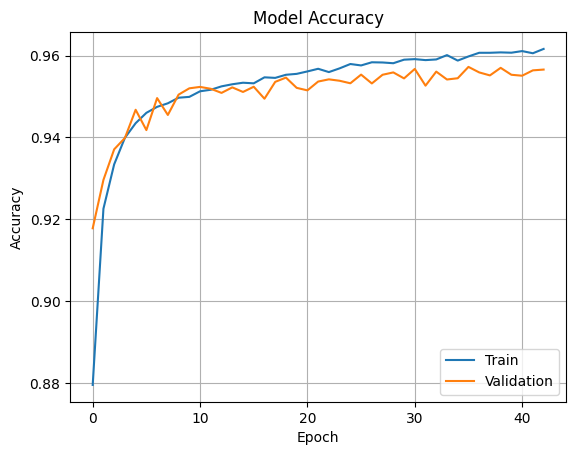

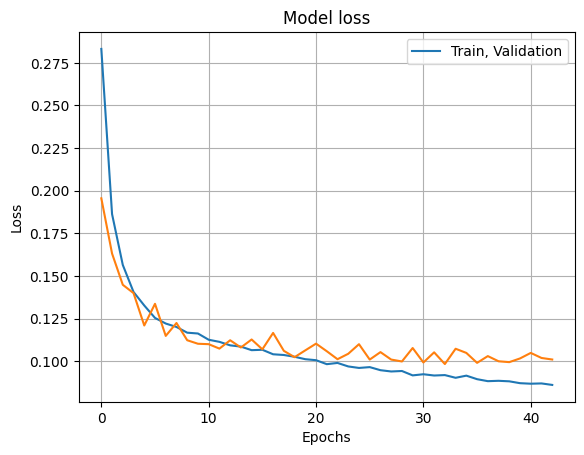

In [122]:
import matplotlib.pyplot as plt

# 훈련 과정 정확도 시각화하기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train',"Validation"],loc='lower right')
plt.show()

# 훈련 과정 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train, Validation"],loc='upper right')
plt.show()